# CS 181 Practical, Spring 2023
Christopher Lee, Justin Liu, Karina Wang

## Retrieving Data

### Install libraries.

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import librosa

from tqdm import tqdm

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.model_selection import GridSearchCV, cross_val_score

### Load raw amplitude data as a numpy object.

In [6]:
# Load train data

X_amp_train = np.load("data/Xtrain_amp.npy")
y_amp_train = np.load("data/ytrain_amp.npy")

In [7]:
X_amp_train.shape

(5553, 44100)

In [8]:
# Load test data

X_amp_test = np.load("data/Xtest_amp.npy")
y_amp_test = np.load("data/ytest_amp.npy")

In [9]:
X_amp_test.shape

(2197, 44100)

### Load Mel spectrogram data as a numpy object.

In [10]:
# Load train data

X_mel_train = np.load("data/Xtrain_mel.npy")
y_mel_train = np.load("data/ytrain_mel.npy")

In [11]:
X_mel_train.shape

(5553, 128, 87)

In [12]:
# Flatten X_mel_train's spectrogram features
X_mel_train_flat = X_mel_train.reshape(X_mel_train.shape[0], -1)
X_mel_train_flat.shape

(5553, 11136)

In [13]:
# Load test data
X_mel_test = np.load("data/Xtest_mel.npy")
y_mel_test = np.load("data/ytest_mel.npy")

In [14]:
X_mel_test.shape

(2197, 128, 87)

In [15]:
# Flatten X_mel_test's spectrogram features
X_mel_test_flat = X_mel_test.reshape(X_mel_test.shape[0], -1)
X_mel_test_flat.shape

(2197, 11136)

### Exploratory Data Analysis

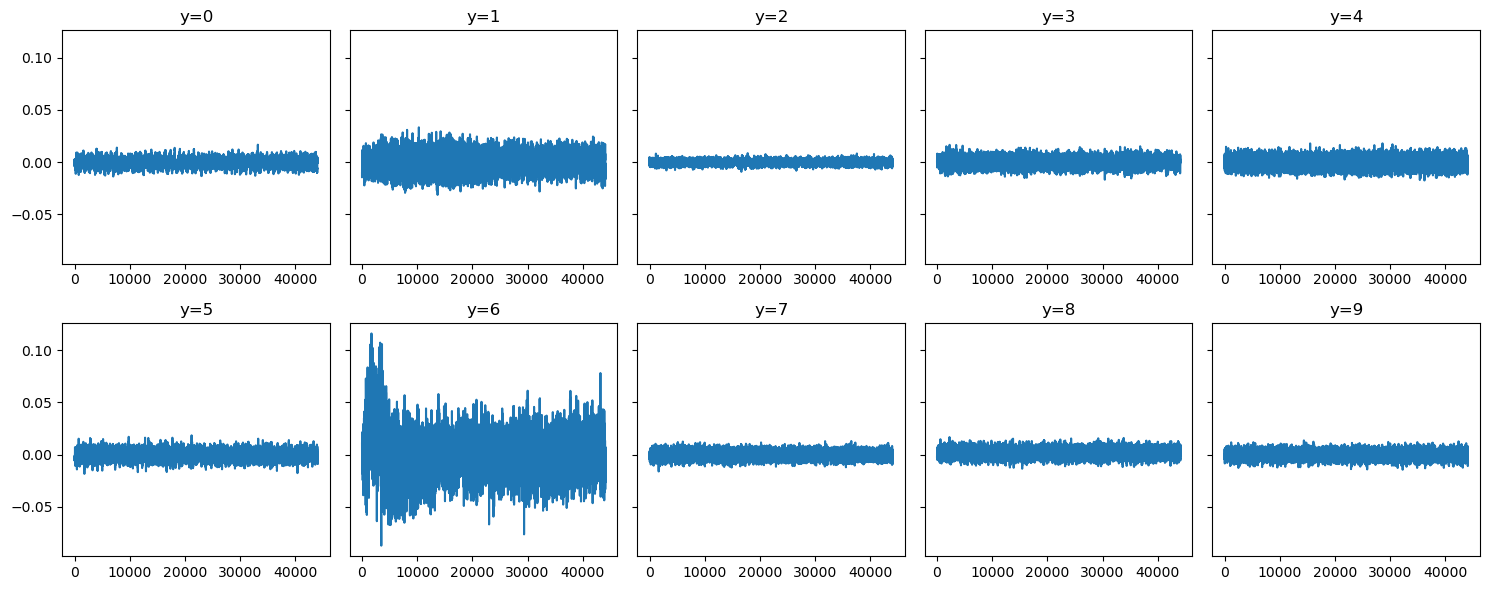

In [14]:
fig, ax = plt.subplots(2, 5, figsize=(15, 6), sharey=True)
axs = ax.ravel()
for i in range(10):
  axs[i].plot(X_amp_train[y_amp_train == i].mean(axis=0))
  axs[i].set_title(f"y={i}")
plt.tight_layout()
plt.show()

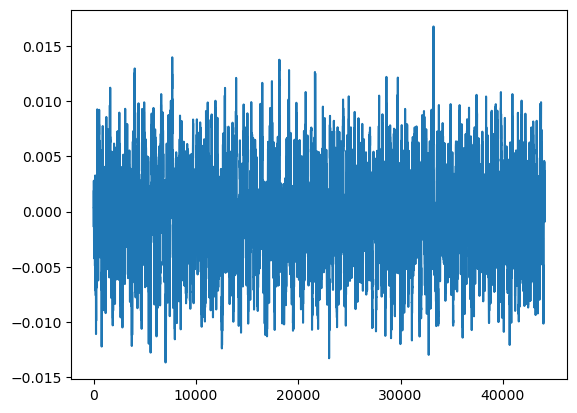

In [15]:
# plt.plot(X_amp_train[y_amp_train == 0].mean(axis=0))
plt.plot(X_amp_train[y_amp_train == 0].mean(axis=0))
plt.show()


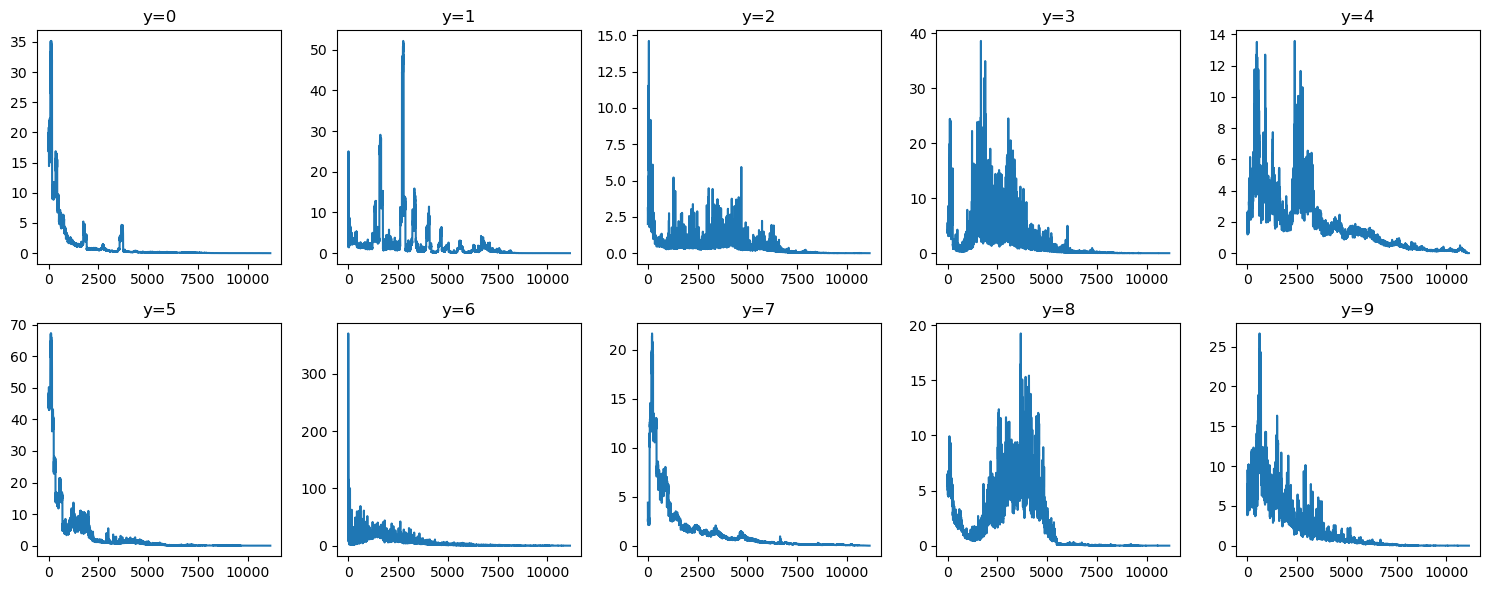

In [17]:
fig, ax = plt.subplots(2, 5, figsize=(15, 6))
axs = ax.ravel()
for i in range(10):
  axs[i].plot(X_mel_train_flat[y_mel_train == i].mean(axis=0))
  axs[i].set_title(f"y={i}")
plt.tight_layout()
plt.show()

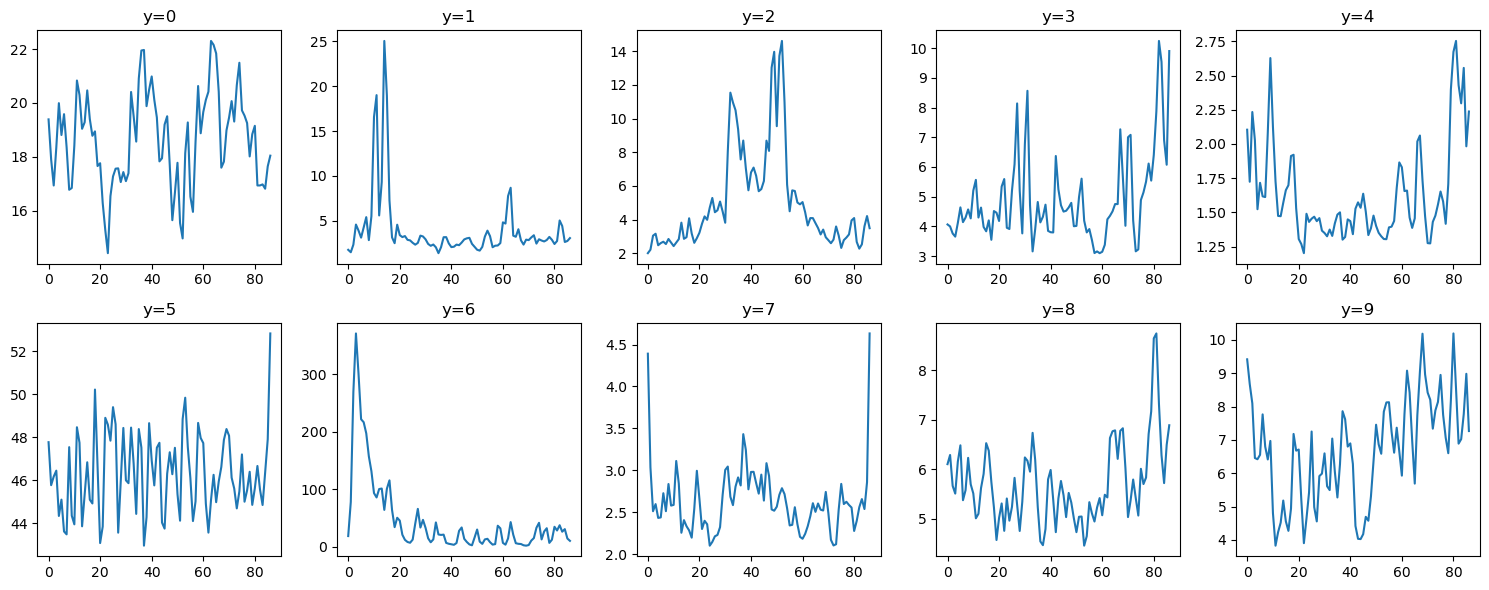

In [19]:
fig, ax = plt.subplots(2, 5, figsize=(15, 6))
axs = ax.ravel()
for i in range(10):
  axs[i].plot(X_mel_train[y_mel_train == i][:,0,:].mean(axis=0))
  axs[i].set_title(f"y={i}")
plt.tight_layout()
plt.show()


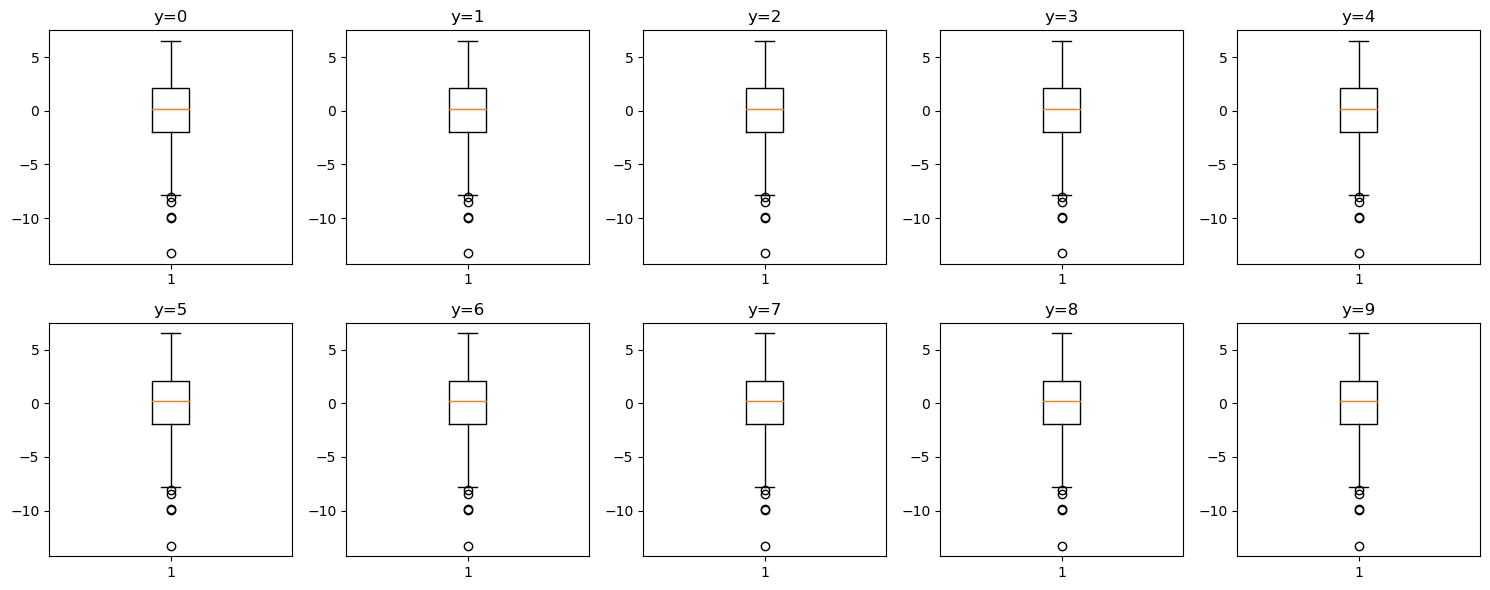

In [25]:
fig, ax = plt.subplots(2, 5, figsize=(15, 6))
axs = ax.ravel()
for i in range(10):
  axs[i].boxplot(np.log(X_mel_train[y_mel_train == 0][:,0,0]))
  axs[i].set_title(f"y={i}")
plt.tight_layout()
plt.show()

## Evaluation Metrics

In [25]:
def accuracy(y_pred, y_true):
    """
    Returns both the overall accuracy as well as the accuracy for each category.
    """
    y_pred = np.array(y_pred)
    y_true = np.array(y_true)

    results = y_pred == y_true
    classes = set(y_true)
    full_acc = results.mean()
    class_accs = {}
    for c in classes:
        class_accs[c] = results[y_true == c].mean()
    return full_acc, class_accs

## Logistic Regression (Baseline Model)

### Logistic Regression 1: Raw Amplitude Features

In [74]:
# create our LogisticRegression classifier (add penalty and class_weight parameters later)
log_amp_model = LogisticRegression(tol=0.0001, max_iter=500)

log_amp_model.fit(X_amp_train, y_amp_train)

y_amp_train_preds = log_amp_model.predict(X_amp_train)
y_amp_test_preds = log_amp_model.predict(X_amp_test)

KeyboardInterrupt: 

In [90]:
accuracy(y_amp_train_preds, y_amp_train)

(0.9773095623987034,
 {0: 0.9928571428571429,
  1: 0.9898477157360406,
  2: 0.9813218390804598,
  3: 0.9502868068833652,
  4: 0.9901153212520593,
  5: 0.9764216366158114,
  6: 0.9759036144578314,
  7: 0.9954407294832827,
  8: 0.9416167664670658,
  9: 0.9814285714285714})

In [87]:
accuracy(y_amp_test_preds, y_amp_test)

(0.17888029130632682,
 {0: 0.2866666666666667,
  1: 0.0,
  2: 0.34448160535117056,
  3: 0.1222707423580786,
  4: 0.011363636363636364,
  5: 0.3068181818181818,
  6: 0.06666666666666667,
  7: 0.0423728813559322,
  8: 0.13983050847457626,
  9: 0.15666666666666668})

### Logistic Regression 2: Mel Spectrogram Features

In [94]:
# create our LogisticRegression classifier (add penalty and class_weight parameters later)
log_mel_model = LogisticRegression(tol=0.0001, max_iter=500)

log_mel_model.fit(X_mel_train_flat, y_mel_train)

y_mel_train_preds = log_mel_model.predict(X_mel_train_flat)
y_mel_test_preds = log_mel_model.predict(X_mel_test_flat)

/Users/karinawang/opt/anaconda3/envs/cs181/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [95]:
accuracy(y_mel_train_preds, y_mel_train)

(0.9387718350441203,
 {0: 0.9442857142857143,
  1: 0.9796954314720813,
  2: 0.9497126436781609,
  3: 0.9082217973231358,
  4: 0.9719934102141681,
  5: 0.8959778085991679,
  6: 0.9879518072289156,
  7: 0.9893617021276596,
  8: 0.8967065868263473,
  9: 0.9357142857142857})

In [96]:
accuracy(y_mel_test_preds, y_mel_test)

(0.34774692762858445,
 {0: 0.21666666666666667,
  1: 0.38461538461538464,
  2: 0.3377926421404682,
  3: 0.1965065502183406,
  4: 0.4431818181818182,
  5: 0.4090909090909091,
  6: 0.7333333333333333,
  7: 0.4406779661016949,
  8: 0.5211864406779662,
  9: 0.21333333333333335})

### Logistic Regression 2a: Mel Spectrogram Features With LASSO Regularization

In [29]:
# create our LogisticRegression classifier (add penalty and class_weight parameters later)
log_mel_model_lasso = LogisticRegression(penalty='l1', tol=0.0001, max_iter=100, solver='liblinear')

log_mel_model_lasso.fit(X_mel_train_flat, y_mel_train)

y_mel_train_preds_lasso = log_mel_model_lasso.predict(X_mel_train_flat)
y_mel_test_preds_lasso = log_mel_model_lasso.predict(X_mel_test_flat)

/Users/karinawang/opt/anaconda3/envs/cs181/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [32]:
accuracy(y_mel_train_preds_lasso, y_mel_train)

(0.9402124977489645,
 {0: 0.9828571428571429,
  1: 0.9695431472081218,
  2: 0.9540229885057471,
  3: 0.8948374760994264,
  4: 0.9719934102141681,
  5: 0.8959778085991679,
  6: 0.9759036144578314,
  7: 0.993920972644377,
  8: 0.8547904191616766,
  9: 0.9542857142857143})

In [33]:
accuracy(y_mel_test_preds_lasso, y_mel_test)

(0.3054164770141102,
 {0: 0.3333333333333333,
  1: 0.41025641025641024,
  2: 0.3010033444816054,
  3: 0.07860262008733625,
  4: 0.3522727272727273,
  5: 0.32196969696969696,
  6: 0.43333333333333335,
  7: 0.4491525423728814,
  8: 0.4110169491525424,
  9: 0.17666666666666667})

## KNN

In [33]:
#amp model
ks = [1,2,3,5,7,10,50,100]
for k in ks:
    knn_model = KNeighborsClassifier(n_neighbors=k).fit(X_amp_train, y_amp_train)
    preds_train = knn_model.predict(X_amp_train)
    preds_test = knn_model.predict(X_amp_test)
    print(f"k={k}")
    print(accuracy(preds_train, y_amp_train))
    print(accuracy(preds_test, y_amp_test))
    print()

 12%|█████▋                                       | 1/8 [00:33<03:55, 33.60s/it]

k=1
(1.0, {0: 1.0, 1: 1.0, 2: 1.0, 3: 1.0, 4: 1.0, 5: 1.0, 6: 1.0, 7: 1.0, 8: 1.0, 9: 1.0})
(0.19754210286754664, {0: 0.13666666666666666, 1: 0.0, 2: 0.20066889632107024, 3: 0.2183406113537118, 4: 0.007575757575757576, 5: 0.3446969696969697, 6: 0.06666666666666667, 7: 0.00423728813559322, 8: 0.711864406779661, 9: 0.06333333333333334})



 25%|███████████▎                                 | 2/8 [01:08<03:25, 34.22s/it]

k=2
(0.6403745723032594, {0: 1.0, 1: 0.9695431472081218, 2: 0.9497126436781609, 3: 0.8260038240917782, 4: 0.6556836902800659, 5: 0.5742024965325936, 6: 0.4578313253012048, 7: 0.3723404255319149, 8: 0.6137724550898204, 9: 0.09571428571428571})
(0.19754210286754664, {0: 0.28, 1: 0.0, 2: 0.2976588628762542, 3: 0.22270742358078602, 4: 0.007575757575757576, 5: 0.2159090909090909, 6: 0.06666666666666667, 7: 0.00847457627118644, 8: 0.597457627118644, 9: 0.02})



 38%|████████████████▉                            | 3/8 [01:46<02:59, 35.85s/it]

k=3
(0.38465694219340896, {0: 0.7428571428571429, 1: 0.5634517766497462, 2: 0.4942528735632184, 3: 0.39961759082217974, 4: 0.09225700164744646, 5: 0.3522884882108183, 6: 0.1566265060240964, 7: 0.04559270516717325, 8: 0.7320359281437125, 9: 0.15714285714285714})
(0.1847974510696404, {0: 0.25666666666666665, 1: 0.0, 2: 0.19732441471571907, 3: 0.12663755458515283, 4: 0.003787878787878788, 5: 0.20454545454545456, 6: 0.06666666666666667, 7: 0.0, 8: 0.75, 9: 0.023333333333333334})



 50%|██████████████████████▌                      | 4/8 [02:24<02:28, 37.00s/it]

k=5
(0.2730055825679813, {0: 0.4142857142857143, 1: 0.08121827411167512, 2: 0.3706896551724138, 3: 0.30019120458891013, 4: 0.006589785831960461, 5: 0.2884882108183079, 6: 0.0963855421686747, 7: 0.00303951367781155, 8: 0.7514970059880239, 9: 0.10142857142857142})
(0.1784251251706873, {0: 0.27, 1: 0.0, 2: 0.1605351170568562, 3: 0.1091703056768559, 4: 0.0, 5: 0.14772727272727273, 6: 0.03333333333333333, 7: 0.0, 8: 0.809322033898305, 9: 0.023333333333333334})



 62%|████████████████████████████▏                | 5/8 [03:05<01:55, 38.36s/it]

k=7
(0.2326670268323429, {0: 0.3628571428571429, 1: 0.04060913705583756, 2: 0.28160919540229884, 3: 0.1950286806883365, 4: 0.0, 5: 0.23994452149791956, 6: 0.0963855421686747, 7: 0.0, 8: 0.7724550898203593, 9: 0.05})
(0.17523896222121074, {0: 0.30333333333333334, 1: 0.0, 2: 0.10367892976588629, 3: 0.1091703056768559, 4: 0.0, 5: 0.11742424242424243, 6: 0.03333333333333333, 7: 0.0, 8: 0.8516949152542372, 9: 0.016666666666666666})



 75%|█████████████████████████████████▊           | 6/8 [03:44<01:17, 38.64s/it]

k=10
(0.19971186745903116, {0: 0.32142857142857145, 1: 0.015228426395939087, 2: 0.17959770114942528, 3: 0.10707456978967496, 4: 0.0016474464579901153, 5: 0.1927877947295423, 6: 0.03614457831325301, 7: 0.0, 8: 0.8158682634730539, 9: 0.017142857142857144})
(0.162949476558944, {0: 0.2866666666666667, 1: 0.0, 2: 0.056856187290969896, 3: 0.06986899563318777, 4: 0.0, 5: 0.09848484848484848, 6: 0.0, 7: 0.0, 8: 0.885593220338983, 9: 0.013333333333333334})



 88%|███████████████████████████████████████▍     | 7/8 [04:25<00:39, 39.28s/it]

k=50
(0.1368629569602017, {0: 0.12285714285714286, 1: 0.0, 2: 0.0, 3: 0.0019120458891013384, 4: 0.0, 5: 0.006934812760055479, 6: 0.0, 7: 0.0, 8: 0.9985029940119761, 9: 0.0014285714285714286})
(0.11925352753755121, {0: 0.09333333333333334, 1: 0.0, 2: 0.0, 3: 0.004366812227074236, 4: 0.0, 5: 0.011363636363636364, 6: 0.0, 7: 0.0, 8: 0.9745762711864406, 9: 0.0})



100%|█████████████████████████████████████████████| 8/8 [05:04<00:00, 38.11s/it]

k=100
(0.13164055465514138, {0: 0.08857142857142856, 1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.0013869625520110957, 6: 0.0, 7: 0.0, 8: 1.0, 9: 0.0})
(0.10650887573964497, {0: 0.006666666666666667, 1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.0, 6: 0.0, 7: 0.0, 8: 0.9830508474576272, 9: 0.0})



## Random Forests

In [35]:
rf = RandomForestClassifier()
rf.fit(X_amp_train, y_amp_train)

RandomForestClassifier()

In [36]:
preds_train = rf.predict(X_amp_train)
preds_test = rf.predict(X_amp_test)
print(accuracy(preds_train, y_amp_train))
print(accuracy(preds_test, y_amp_test))


(1.0, {0: 1.0, 1: 1.0, 2: 1.0, 3: 1.0, 4: 1.0, 5: 1.0, 6: 1.0, 7: 1.0, 8: 1.0, 9: 1.0})
(0.22394173873463813, {0: 0.10666666666666667, 1: 0.0, 2: 0.5484949832775919, 3: 0.27074235807860264, 4: 0.2196969696969697, 5: 0.29924242424242425, 6: 0.0, 7: 0.19491525423728814, 8: 0.05508474576271186, 9: 0.12666666666666668})


In [45]:
param_grid = {
    "max_depth": [1, 5, 10, 25, 50, 100],
    "max_features": ["sqrt", "log2", None]
}
rf = RandomForestClassifier(verbose=0)
grid_clf = GridSearchCV(rf, param_grid, cv=10)
grid_clf.fit(X_mel_train_flat, y_mel_train)

KeyboardInterrupt: 

In [42]:
for max_depth in max_depth_vals:
    for max_features in max_features_vals:
        rf = RandomForestClassifier(
            max_depth=max_depth,
            max_features=max_features
        )
        rf.fit(X_mel_train_flat, y_mel_train)
        preds_train = rf.predict(X_mel_train_flat)
        preds_test = rf.predict(X_mel_test_flat)
        
        train_score = accuracy(preds_train, y_mel_train)
        test_score = accuracy(preds_test, y_mel_test)
        
        train_scores[max_depth, max_features] = train_score
        test_scores[max_depth, max_features] = test_score
        
        print(max_depth, max_features)
        print(f"{train_score[0]:.3f}, {test_score[0]:.3f}")

1 sqrt
0.211, 0.242
1 log2
0.209, 0.236


KeyboardInterrupt: 

## PCA

In [ ]:
sc = StandardScaler()
sc.fit(X_mel_train_flat)

X_mel_train_norm = sc.transform(X_mel_train_flat)
X_mel_test_norm = sc.transform(X_mel_test_flat)

pca_mel = PCA(n_components=200)
pca_mel.fit(X_mel_train_norm)

X_mel_train_pca = pca_mel.transform(X_mel_train_norm)
X_mel_test_pca = pca_mel.transform(X_mel_test_norm)

## PCA KNN

In [32]:
ks = [1,2,3,5,7,10,50,100]
for k in ks:
    knn_model = KNeighborsClassifier(n_neighbors=k).fit(
        X_mel_train_pca,
        y_mel_train
    )
    preds_train = knn_model.predict(X_mel_train_pca)
    preds_test = knn_model.predict(X_mel_test_pca)
    print(f"k={k}")
    print(accuracy(preds_train, y_amp_train))
    print(accuracy(preds_test, y_amp_test))
    print()

k=1
(1.0, {0: 1.0, 1: 1.0, 2: 1.0, 3: 1.0, 4: 1.0, 5: 1.0, 6: 1.0, 7: 1.0, 8: 1.0, 9: 1.0})
(0.3732362312243969, {0: 0.22, 1: 0.41025641025641024, 2: 0.38461538461538464, 3: 0.2445414847161572, 4: 0.5606060606060606, 5: 0.23106060606060605, 6: 0.5, 7: 0.4364406779661017, 8: 0.6483050847457628, 9: 0.29})

k=2
(0.8627768773635872, {0: 1.0, 1: 0.9695431472081218, 2: 0.9482758620689655, 3: 0.7992351816443595, 4: 0.9357495881383855, 5: 0.9597780859916782, 6: 0.891566265060241, 7: 0.9483282674772037, 8: 0.8203592814371258, 9: 0.4514285714285714})
(0.3623122439690487, {0: 0.2866666666666667, 1: 0.46153846153846156, 2: 0.5117056856187291, 3: 0.3056768558951965, 4: 0.5454545454545454, 5: 0.19696969696969696, 6: 0.43333333333333335, 7: 0.3855932203389831, 8: 0.5805084745762712, 9: 0.10666666666666667})

k=3
(0.8303619665045922, {0: 0.9628571428571429, 1: 0.8477157360406091, 2: 0.7456896551724138, 3: 0.609942638623327, 4: 0.9126853377265239, 5: 0.9472954230235784, 6: 0.891566265060241, 7: 0.96352

## PCA Random Forests

### Amp

In [48]:
sc = StandardScaler()
sc.fit(X_amp_train)

X_amp_train_norm = sc.transform(X_amp_train)
X_amp_test_norm = sc.transform(X_amp_test)

pca_amp = PCA(n_components=400)
pca_amp.fit(X_amp_train_norm)

X_amp_train_pca = pca_amp.transform(X_amp_train_norm)
X_amp_test_pca = pca_amp.transform(X_amp_test_norm)

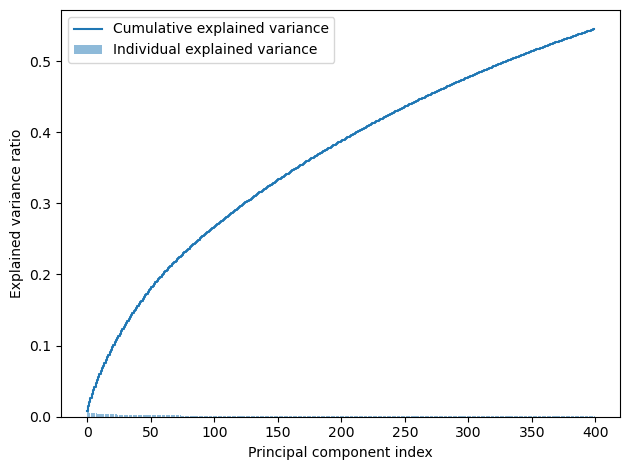

In [49]:
exp_var_pca = pca_amp.explained_variance_ratio_
cum_sum_eigenvalues = np.cumsum(exp_var_pca)

plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [84]:
rf = RandomForestClassifier()
rf.fit(X_amp_train_pca, y_amp_train)

RandomForestClassifier()

In [85]:
preds_train = rf.predict(X_amp_train_pca)
preds_test = rf.predict(X_amp_test_pca)
print(accuracy(preds_train, y_amp_train))
print(accuracy(preds_test, y_amp_test))

(1.0, {0: 1.0, 1: 1.0, 2: 1.0, 3: 1.0, 4: 1.0, 5: 1.0, 6: 1.0, 7: 1.0, 8: 1.0, 9: 1.0})
(0.2507965407373691, {0: 0.24333333333333335, 1: 0.0, 2: 0.6321070234113713, 3: 0.013100436681222707, 4: 0.1553030303030303, 5: 0.3977272727272727, 6: 0.03333333333333333, 7: 0.19491525423728814, 8: 0.21610169491525424, 9: 0.14})


In [54]:
param_grid = {
    "max_depth": [1, 5, 10, 25, 50, 100],
    "max_features": ["sqrt", "log2", None]
}
rf = RandomForestClassifier()
grid_rf = GridSearchCV(rf, param_grid, cv=10, verbose=2, n_jobs=-1)
grid_rf.fit(X_amp_train_pca, y_amp_train)

Fitting 10 folds for each of 18 candidates, totalling 180 fits
[CV] END .....................max_depth=1, max_features=sqrt; total time=   1.0s
[CV] END .....................max_depth=1, max_features=log2; total time=   0.5s
[CV] END .....................max_depth=1, max_features=None; total time=  15.9s
[CV] END .....................max_depth=1, max_features=None; total time=  15.9s
[CV] END .....................max_depth=5, max_features=None; total time= 1.2min
[CV] END ....................max_depth=10, max_features=sqrt; total time=   7.3s
[CV] END ....................max_depth=10, max_features=log2; total time=   3.1s
[CV] END ....................max_depth=10, max_features=log2; total time=   3.1s
[CV] END ....................max_depth=10, max_features=None; total time= 2.3min
[CV] END ....................max_depth=25, max_features=sqrt; total time=  10.8s
[CV] END ....................max_depth=25, max_features=sqrt; total time=  10.6s
[CV] END ....................max_depth=25, max

GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [1, 5, 10, 25, 50, 100],
                         'max_features': ['sqrt', 'log2', None]},
             verbose=2)

[CV] END .....................max_depth=1, max_features=sqrt; total time=   1.0s
[CV] END .....................max_depth=1, max_features=log2; total time=   0.5s
[CV] END .....................max_depth=1, max_features=None; total time=  15.9s
[CV] END .....................max_depth=1, max_features=None; total time=  15.7s
[CV] END .....................max_depth=5, max_features=None; total time= 1.2min
[CV] END ....................max_depth=10, max_features=sqrt; total time=   7.2s
[CV] END ....................max_depth=10, max_features=log2; total time=   3.1s
[CV] END ....................max_depth=10, max_features=log2; total time=   3.1s
[CV] END ....................max_depth=10, max_features=None; total time= 2.3min
[CV] END ....................max_depth=25, max_features=sqrt; total time=  10.9s
[CV] END ....................max_depth=25, max_features=sqrt; total time=  10.6s
[CV] END ....................max_depth=25, max_features=sqrt; total time=  10.9s
[CV] END ...................

In [58]:
preds_train = grid_rf.predict(X_amp_train_pca)
preds_test = grid_rf.predict(X_amp_test_pca)
print(accuracy(preds_train, y_amp_train))
print(accuracy(preds_test, y_amp_test))

(1.0, {0: 1.0, 1: 1.0, 2: 1.0, 3: 1.0, 4: 1.0, 5: 1.0, 6: 1.0, 7: 1.0, 8: 1.0, 9: 1.0})
(0.26308602639963585, {0: 0.3333333333333333, 1: 0.0, 2: 0.6153846153846154, 3: 0.06550218340611354, 4: 0.13636363636363635, 5: 0.4015151515151515, 6: 0.03333333333333333, 7: 0.18220338983050846, 8: 0.2288135593220339, 9: 0.13})


In [78]:
preds_train = rf.predict(X_amp_train_pca)
preds_test = rf.predict(X_amp_test_pca)
print(accuracy(preds_train, y_amp_train))
print(accuracy(preds_test, y_amp_test))

(1.0, {0: 1.0, 1: 1.0, 2: 1.0, 3: 1.0, 4: 1.0, 5: 1.0, 6: 1.0, 7: 1.0, 8: 1.0, 9: 1.0})
(0.2612653618570778, {0: 0.2966666666666667, 1: 0.0, 2: 0.6488294314381271, 3: 0.034934497816593885, 4: 0.13636363636363635, 5: 0.4431818181818182, 6: 0.03333333333333333, 7: 0.16101694915254236, 8: 0.2033898305084746, 9: 0.14333333333333334})


In [60]:
max_depth_vals = [1, 5, 10, 25, 50, 100]
max_features_vals = ["sqrt", "log2", None]
train_scores = {}
test_scores = {}

In [61]:
for max_depth in max_depth_vals:
    for max_features in max_features_vals:
        rf = RandomForestClassifier(
            max_depth=max_depth,
            max_features=max_features
        )
        rf.fit(X_amp_train_pca, y_amp_train)
        preds_train = rf.predict(X_amp_train_pca)
        preds_test = rf.predict(X_amp_test_pca)
        
        train_score = accuracy(preds_train, y_amp_train)
        test_score = accuracy(preds_test, y_amp_test)
        
        train_scores[max_depth, max_features] = train_score
        test_scores[max_depth, max_features] = test_score
        
        print(max_depth, max_features)
        print(f"{train_score[0]:.3f}, {test_score[0]:.3f}")

1 sqrt
0.194, 0.215
1 log2
0.201, 0.209
1 None
0.189, 0.196
5 sqrt
0.306, 0.237
5 log2
0.302, 0.240
5 None
0.270, 0.220
10 sqrt
0.630, 0.265
10 log2
0.636, 0.268
10 None
0.618, 0.263
25 sqrt
1.000, 0.279
25 log2
1.000, 0.263
25 None
1.000, 0.258
50 sqrt
1.000, 0.271
50 log2
1.000, 0.264
50 None
1.000, 0.250
100 sqrt
1.000, 0.270
100 log2
1.000, 0.271
100 None
1.000, 0.256


### Mel

In [34]:
sc = StandardScaler()
sc.fit(X_mel_train_flat)

X_mel_train_norm = sc.transform(X_mel_train_flat)
X_mel_test_norm = sc.transform(X_mel_test_flat)

pca_mel = PCA(n_components=200)
pca_mel.fit(X_mel_train_norm)

X_mel_train_pca = pca_mel.transform(X_mel_train_norm)
X_mel_test_pca = pca_mel.transform(X_mel_test_norm)

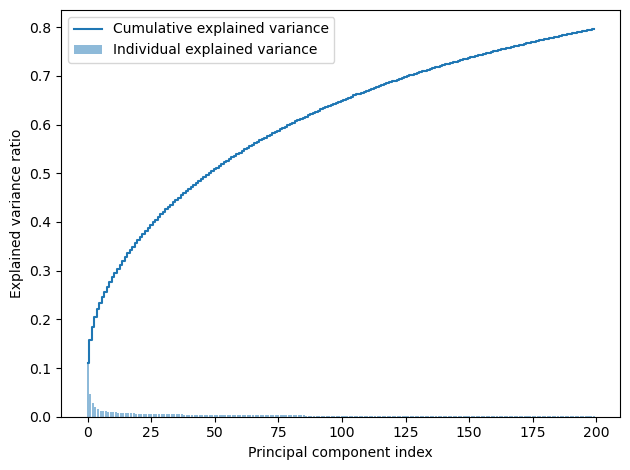

In [35]:
exp_var_pca = pca_mel.explained_variance_ratio_
cum_sum_eigenvalues = np.cumsum(exp_var_pca)

plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [86]:
rf = RandomForestClassifier()
rf.fit(X_mel_train_pca, y_mel_train)

RandomForestClassifier()

In [87]:
preds_train = rf.predict(X_mel_train_pca)
preds_test = rf.predict(X_mel_test_pca)
print(accuracy(preds_train, y_mel_train))
print(accuracy(preds_test, y_mel_test))

(1.0, {0: 1.0, 1: 1.0, 2: 1.0, 3: 1.0, 4: 1.0, 5: 1.0, 6: 1.0, 7: 1.0, 8: 1.0, 9: 1.0})
(0.41420118343195267, {0: 0.19, 1: 0.5641025641025641, 2: 0.568561872909699, 3: 0.3318777292576419, 4: 0.5340909090909091, 5: 0.23106060606060605, 6: 0.26666666666666666, 7: 0.3177966101694915, 8: 0.7288135593220338, 9: 0.4266666666666667})


In [38]:
max_depth_vals = [1, 5, 10, 25, 50, 100]
max_features_vals = ["sqrt", "log2", None]
train_scores = {}
test_scores = {}

In [39]:
for max_depth in max_depth_vals:
    for max_features in max_features_vals:
        rf = RandomForestClassifier(
            max_depth=max_depth,
            max_features=max_features
        )
        rf.fit(X_mel_train_pca, y_mel_train)
        preds_train = rf.predict(X_mel_train_pca)
        preds_test = rf.predict(X_mel_test_pca)
        
        train_score = accuracy(preds_train, y_mel_train)
        test_score = accuracy(preds_test, y_mel_test)
        
        train_scores[max_depth, max_features] = train_score
        test_scores[max_depth, max_features] = test_score
        
        print(max_depth, max_features)
        print(f"{train_score[0]:.3f}, {test_score[0]:.3f}")

1 sqrt
0.372, 0.312
1 log2
0.330, 0.269
1 None
0.202, 0.177
5 sqrt
0.603, 0.391
5 log2
0.599, 0.375
5 None
0.540, 0.392
10 sqrt
0.914, 0.424
10 log2
0.905, 0.424
10 None
0.948, 0.422
25 sqrt
1.000, 0.426
25 log2
1.000, 0.406
25 None
1.000, 0.422
50 sqrt
1.000, 0.421
50 log2
1.000, 0.402
50 None
1.000, 0.420
100 sqrt
1.000, 0.426
100 log2
1.000, 0.419
100 None
1.000, 0.428


### MinMaxScaler

In [60]:
sc = MinMaxScaler()
sc.fit(X_mel_train_flat)

X_mel_train_norm = sc.transform(X_mel_train_flat)
X_mel_test_norm = sc.transform(X_mel_test_flat)

pca_mel = PCA(n_components=200)
pca_mel.fit(X_mel_train_norm)

X_mel_train_pca = pca_mel.transform(X_mel_train_norm)
X_mel_test_pca = pca_mel.transform(X_mel_test_norm)

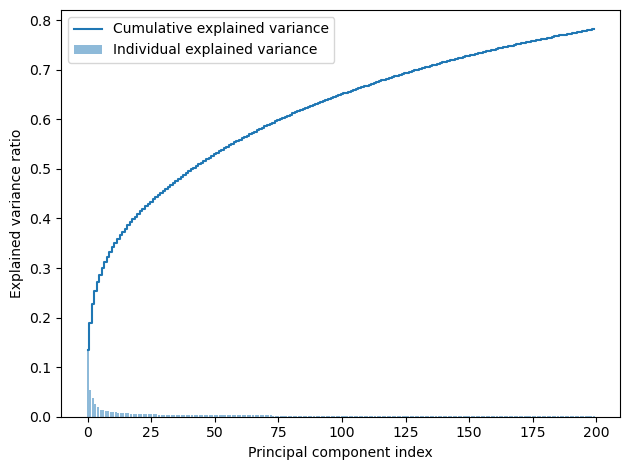

In [61]:
exp_var_pca = pca_mel.explained_variance_ratio_
cum_sum_eigenvalues = np.cumsum(exp_var_pca)

plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [62]:
rf = RandomForestClassifier()
rf.fit(X_mel_train_pca, y_mel_train)

RandomForestClassifier()

In [63]:
preds_train = rf.predict(X_mel_train_pca)
preds_test = rf.predict(X_mel_test_pca)
print(accuracy(preds_train, y_mel_train))
print(accuracy(preds_test, y_mel_test))

(1.0, {0: 1.0, 1: 1.0, 2: 1.0, 3: 1.0, 4: 1.0, 5: 1.0, 6: 1.0, 7: 1.0, 8: 1.0, 9: 1.0})
(0.42922166590805644, {0: 0.2, 1: 0.5641025641025641, 2: 0.5719063545150501, 3: 0.34497816593886466, 4: 0.5189393939393939, 5: 0.2878787878787879, 6: 0.3, 7: 0.3432203389830508, 8: 0.7330508474576272, 9: 0.45})


In [64]:
max_depth_vals = [1, 5, 10, 25, 50, 100]
max_features_vals = ["sqrt", "log2", None]
train_scores = {}
test_scores = {}

In [65]:
for max_depth in max_depth_vals:
    for max_features in max_features_vals:
        rf = RandomForestClassifier(
            max_depth=max_depth,
            max_features=max_features
        )
        rf.fit(X_mel_train_pca, y_mel_train)
        preds_train = rf.predict(X_mel_train_pca)
        preds_test = rf.predict(X_mel_test_pca)
        
        train_score = accuracy(preds_train, y_mel_train)
        test_score = accuracy(preds_test, y_mel_test)
        
        train_scores[max_depth, max_features] = train_score
        test_scores[max_depth, max_features] = test_score
        
        print(max_depth, max_features)
        print(f"{train_score[0]:.3f}, {test_score[0]:.3f}")

1 sqrt
0.357, 0.312
1 log2
0.353, 0.291
1 None
0.247, 0.228
5 sqrt
0.590, 0.376
5 log2
0.567, 0.355
5 None
0.525, 0.356
10 sqrt
0.908, 0.419
10 log2
0.892, 0.406
10 None
0.908, 0.422
25 sqrt
1.000, 0.418
25 log2
1.000, 0.403
25 None
1.000, 0.426
50 sqrt
1.000, 0.418
50 log2
1.000, 0.400
50 None
1.000, 0.418
100 sqrt
1.000, 0.426
100 log2
1.000, 0.403
100 None
1.000, 0.427


In [158]:
param_grid = {
    "max_depth": [1, 5, 10, 25, 50, 100],
    "max_features": ["sqrt", "log2", None]
}
rf = RandomForestClassifier()
grid_rf = GridSearchCV(rf, param_grid, cv=10, verbose=2, n_jobs=-1)
grid_rf.fit(X_mel_train_pca, y_mel_train)

Fitting 10 folds for each of 18 candidates, totalling 180 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [1, 5, 10, 25, 50, 100],
                         'max_features': ['sqrt', 'log2', None]},
             verbose=2)

In [159]:
grid_rf.best_params_

{'max_depth': 25, 'max_features': None}

In [160]:
preds_train = grid_rf.predict(X_mel_train_pca)
preds_test = grid_rf.predict(X_mel_test_pca)
print(accuracy(preds_train, y_mel_train))
print(accuracy(preds_test, y_mel_test))

(1.0, {0: 1.0, 1: 1.0, 2: 1.0, 3: 1.0, 4: 1.0, 5: 1.0, 6: 1.0, 7: 1.0, 8: 1.0, 9: 1.0})
(0.40828402366863903, {0: 0.20333333333333334, 1: 0.5897435897435898, 2: 0.5351170568561873, 3: 0.37117903930131, 4: 0.5151515151515151, 5: 0.26136363636363635, 6: 0.26666666666666666, 7: 0.3135593220338983, 8: 0.6567796610169492, 9: 0.42})
[CV] END .....................max_depth=1, max_features=sqrt; total time=   0.7s
[CV] END .....................max_depth=1, max_features=log2; total time=   0.5s
[CV] END .....................max_depth=1, max_features=log2; total time=   0.4s
[CV] END .....................max_depth=1, max_features=None; total time=   7.7s
[CV] END .....................max_depth=5, max_features=sqrt; total time=   2.9s
[CV] END .....................max_depth=5, max_features=sqrt; total time=   2.7s
[CV] END .....................max_depth=5, max_features=log2; total time=   1.6s
[CV] END .....................max_depth=5, max_features=None; total time=  35.4s
[CV] END ..............

[CV] END .....................max_depth=1, max_features=sqrt; total time=   0.7s
[CV] END .....................max_depth=1, max_features=log2; total time=   0.5s
[CV] END .....................max_depth=1, max_features=log2; total time=   0.4s
[CV] END .....................max_depth=1, max_features=None; total time=   7.8s
[CV] END .....................max_depth=5, max_features=sqrt; total time=   2.8s
[CV] END .....................max_depth=5, max_features=log2; total time=   1.5s
[CV] END .....................max_depth=5, max_features=log2; total time=   1.5s
[CV] END .....................max_depth=5, max_features=log2; total time=   1.6s
[CV] END .....................max_depth=5, max_features=None; total time=  35.6s
[CV] END ....................max_depth=10, max_features=sqrt; total time=   4.7s
[CV] END ....................max_depth=10, max_features=sqrt; total time=   4.9s
[CV] END ....................max_depth=10, max_features=log2; total time=   2.6s
[CV] END ...................

In [161]:
for p, s in zip(grid_rf.cv_results_['params'], grid_rf.cv_results_['mean_test_score']):
    out.append((p, s))

In [167]:
grid_rf.cv_results_['mean_test_score']

array([0.304161  , 0.29282552, 0.23122043, 0.45417363, 0.43112904,
       0.43292987, 0.56796941, 0.54222244, 0.57625122, 0.59822088,
       0.58597576, 0.61190712, 0.5960652 , 0.5834581 , 0.60596312,
       0.59947793, 0.5776933 , 0.60884276])

In [81]:
# create our LogisticRegression classifier (add penalty and class_weight parameters later)
log_amp_model = LogisticRegression(tol=0.0001, max_iter=500)

log_amp_model.fit(X_amp_train_pca, y_amp_train)

y_amp_train_preds = log_amp_model.predict(X_amp_train_pca)
y_amp_test_preds = log_amp_model.predict(X_amp_test_pca)

In [82]:
accuracy(y_amp_train_preds, y_amp_train)

(0.36916981811633354,
 {0: 0.3742857142857143,
  1: 0.3299492385786802,
  2: 0.521551724137931,
  3: 0.2294455066921606,
  4: 0.2701812191103789,
  5: 0.39805825242718446,
  6: 0.6024096385542169,
  7: 0.3586626139817629,
  8: 0.3712574850299401,
  9: 0.36428571428571427})

In [83]:
accuracy(y_amp_test_preds, y_amp_test)

(0.18252162039144287,
 {0: 0.19,
  1: 0.02564102564102564,
  2: 0.5418060200668896,
  3: 0.0611353711790393,
  4: 0.09848484848484848,
  5: 0.1553030303030303,
  6: 0.0,
  7: 0.11440677966101695,
  8: 0.11016949152542373,
  9: 0.15666666666666668})

In [75]:
# create our LogisticRegression classifier (add penalty and class_weight parameters later)
log_mel_model = LogisticRegression(tol=0.0001, max_iter=500)

log_mel_model.fit(X_mel_train_pca, y_mel_train)

y_mel_train_preds = log_mel_model.predict(X_mel_train_pca)
y_mel_test_preds = log_mel_model.predict(X_mel_test_pca)

In [78]:
accuracy(y_mel_train_preds, y_mel_train)

(0.49270664505672607,
 {0: 0.43142857142857144,
  1: 0.4010152284263959,
  2: 0.8433908045977011,
  3: 0.3422562141491396,
  4: 0.5848434925864909,
  5: 0.42718446601941745,
  6: 0.5783132530120482,
  7: 0.5045592705167173,
  8: 0.4550898203592814,
  9: 0.3457142857142857})

In [80]:
accuracy(y_mel_test_preds, y_mel_test)

(0.38689121529358217,
 {0: 0.2633333333333333,
  1: 0.6153846153846154,
  2: 0.862876254180602,
  3: 0.18340611353711792,
  4: 0.38257575757575757,
  5: 0.22727272727272727,
  6: 0.3,
  7: 0.4067796610169492,
  8: 0.4152542372881356,
  9: 0.27666666666666667})

In [88]:
#amp model
ks = [1,2,3,5,7,10,50,100]
for k in tqdm(ks):
    knn_model = KNeighborsClassifier(n_neighbors=k).fit(X_amp_train_pca, y_amp_train)
    preds_train = knn_model.predict(X_amp_train_pca)
    preds_test = knn_model.predict(X_amp_test_pca)
    print(f"k={k}")
    print(accuracy(preds_train, y_amp_train))
    print(accuracy(preds_test, y_amp_test))
    print()

 12%|█████▋                                       | 1/8 [00:00<00:06,  1.14it/s]

k=1
(1.0, {0: 1.0, 1: 1.0, 2: 1.0, 3: 1.0, 4: 1.0, 5: 1.0, 6: 1.0, 7: 1.0, 8: 1.0, 9: 1.0})
(0.21256258534365044, {0: 0.30666666666666664, 1: 0.0, 2: 0.18729096989966554, 3: 0.2925764192139738, 4: 0.06060606060606061, 5: 0.29924242424242425, 6: 0.13333333333333333, 7: 0.012711864406779662, 8: 0.4661016949152542, 9: 0.13333333333333333})



 25%|███████████▎                                 | 2/8 [00:01<00:04,  1.23it/s]

k=2
(0.5859895551953899, {0: 1.0, 1: 0.8883248730964467, 2: 0.8548850574712644, 3: 0.7380497131931166, 4: 0.5057660626029654, 5: 0.565880721220527, 6: 0.5542168674698795, 7: 0.41793313069908816, 8: 0.3937125748502994, 9: 0.14142857142857143})
(0.1943559399180701, {0: 0.4666666666666667, 1: 0.02564102564102564, 2: 0.24749163879598662, 3: 0.2794759825327511, 4: 0.06060606060606061, 5: 0.18181818181818182, 6: 0.1, 7: 0.00423728813559322, 8: 0.3135593220338983, 9: 0.02})



 38%|████████████████▉                            | 3/8 [00:02<00:04,  1.22it/s]

k=3
(0.457590491626148, {0: 0.8657142857142858, 1: 0.6192893401015228, 2: 0.5732758620689655, 3: 0.5047801147227533, 4: 0.27677100494233936, 5: 0.42163661581137307, 6: 0.3253012048192771, 7: 0.24772036474164133, 8: 0.48353293413173654, 9: 0.2357142857142857})
(0.18115612198452435, {0: 0.4766666666666667, 1: 0.02564102564102564, 2: 0.2040133779264214, 3: 0.1965065502183406, 4: 0.045454545454545456, 5: 0.13257575757575757, 6: 0.06666666666666667, 7: 0.0, 8: 0.3813559322033898, 9: 0.03})



 50%|██████████████████████▌                      | 4/8 [00:03<00:03,  1.22it/s]

k=5
(0.37511255177381597, {0: 0.7042857142857143, 1: 0.2233502538071066, 2: 0.4051724137931034, 3: 0.4359464627151052, 4: 0.20593080724876442, 5: 0.3841886269070735, 6: 0.26506024096385544, 7: 0.22340425531914893, 8: 0.4865269461077844, 9: 0.2})
(0.17569412835685025, {0: 0.4266666666666667, 1: 0.02564102564102564, 2: 0.1605351170568562, 3: 0.18340611353711792, 4: 0.041666666666666664, 5: 0.12878787878787878, 6: 0.06666666666666667, 7: 0.00423728813559322, 8: 0.4533898305084746, 9: 0.04})



 62%|████████████████████████████▏                | 5/8 [00:04<00:02,  1.23it/s]

k=7
(0.3389159013146047, {0: 0.6785714285714286, 1: 0.15228426395939088, 2: 0.3692528735632184, 3: 0.3652007648183556, 4: 0.17627677100494235, 5: 0.34396671289875175, 6: 0.20481927710843373, 7: 0.18085106382978725, 8: 0.5029940119760479, 9: 0.1457142857142857})
(0.17796995903504778, {0: 0.43333333333333335, 1: 0.0, 2: 0.15719063545150502, 3: 0.16593886462882096, 4: 0.05303030303030303, 5: 0.13257575757575757, 6: 0.06666666666666667, 7: 0.00423728813559322, 8: 0.4957627118644068, 9: 0.023333333333333334})



 75%|█████████████████████████████████▊           | 6/8 [00:04<00:01,  1.24it/s]

k=10
(0.30668107329371513, {0: 0.6457142857142857, 1: 0.1116751269035533, 2: 0.3232758620689655, 3: 0.3173996175908222, 4: 0.128500823723229, 5: 0.29819694868238555, 6: 0.13253012048192772, 7: 0.1580547112462006, 8: 0.5089820359281437, 9: 0.12857142857142856})
(0.16841147018661812, {0: 0.4, 1: 0.0, 2: 0.12709030100334448, 3: 0.1572052401746725, 4: 0.041666666666666664, 5: 0.11742424242424243, 6: 0.06666666666666667, 7: 0.0, 8: 0.5211864406779662, 9: 0.03})



 88%|███████████████████████████████████████▍     | 7/8 [00:05<00:00,  1.23it/s]

k=50
(0.20421393841166938, {0: 0.43714285714285717, 1: 0.005076142131979695, 2: 0.15229885057471265, 3: 0.12619502868068833, 4: 0.06260296540362438, 5: 0.10818307905686546, 6: 0.0, 7: 0.06382978723404255, 8: 0.6751497005988024, 9: 0.06571428571428571})
(0.12562585343650431, {0: 0.2866666666666667, 1: 0.0, 2: 0.05016722408026756, 3: 0.043668122270742356, 4: 0.003787878787878788, 5: 0.026515151515151516, 6: 0.0, 7: 0.0, 8: 0.635593220338983, 9: 0.023333333333333334})



100%|█████████████████████████████████████████████| 8/8 [00:06<00:00,  1.21it/s]

k=100
(0.1640554655141365, {0: 0.3357142857142857, 1: 0.0, 2: 0.08333333333333333, 3: 0.05927342256214149, 4: 0.03130148270181219, 5: 0.04022191400832178, 6: 0.0, 7: 0.04711246200607903, 8: 0.7080838323353293, 9: 0.05})
(0.1187983614019117, {0: 0.2833333333333333, 1: 0.0, 2: 0.026755852842809364, 3: 0.013100436681222707, 4: 0.003787878787878788, 5: 0.011363636363636364, 6: 0.0, 7: 0.0, 8: 0.6779661016949152, 9: 0.0033333333333333335})



In [103]:
#amp model

ks = list(range(1,11))
accuracies = []
for k in ks:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_mel_train_pca, y_mel_train, cv=5)
    accuracies.append(np.mean(scores))
best_k = ks[accuracies.index(max(accuracies))]
best_k

3

In [137]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_mel_train_pca, y_mel_train)

KNeighborsClassifier(n_neighbors=3)

In [138]:
preds_train = knn.predict(X_mel_train_pca)
preds_test = knn.predict(X_mel_test_pca)

In [139]:
accuracy(preds_train, y_mel_train)

(0.8213578245993157,
 {0: 0.9628571428571429,
  1: 0.8426395939086294,
  2: 0.728448275862069,
  3: 0.6137667304015296,
  4: 0.9192751235584844,
  5: 0.9334257975034674,
  6: 0.891566265060241,
  7: 0.9452887537993921,
  8: 0.8622754491017964,
  9: 0.5571428571428572})

In [140]:
accuracy(preds_test, y_mel_test)

(0.3709604005461994,
 {0: 0.3,
  1: 0.5128205128205128,
  2: 0.42474916387959866,
  3: 0.24017467248908297,
  4: 0.5265151515151515,
  5: 0.26136363636363635,
  6: 0.43333333333333335,
  7: 0.4110169491525424,
  8: 0.5932203389830508,
  9: 0.21666666666666667})

[CV] END ....................n_neighbors=1, weights=distance; total time=   0.3s
[CV] END .....................n_neighbors=2, weights=uniform; total time=   0.2s
[CV] END ....................n_neighbors=2, weights=distance; total time=   0.2s
[CV] END ....................n_neighbors=3, weights=distance; total time=   0.2s
[CV] END ....................n_neighbors=5, weights=distance; total time=   0.3s
[CV] END ....................n_neighbors=10, weights=uniform; total time=   0.2s
[CV] END ....................n_neighbors=20, weights=uniform; total time=   0.3s
[CV] END ....................n_neighbors=30, weights=uniform; total time=   0.2s
[CV] END ...................n_neighbors=30, weights=distance; total time=   0.2s
[CV] END ...................n_neighbors=50, weights=distance; total time=   0.2s
[CV] END .....................n_neighbors=1, weights=uniform; total time=   0.4s
[CV] END .....................n_neighbors=2, weights=uniform; total time=   0.2s
[CV] END ...................

[CV] END ....................n_neighbors=1, weights=distance; total time=   0.3s
[CV] END .....................n_neighbors=2, weights=uniform; total time=   0.2s
[CV] END ....................n_neighbors=2, weights=distance; total time=   0.2s
[CV] END ....................n_neighbors=3, weights=distance; total time=   0.2s
[CV] END .....................n_neighbors=5, weights=uniform; total time=   0.2s
[CV] END ....................n_neighbors=10, weights=uniform; total time=   0.3s
[CV] END ....................n_neighbors=20, weights=uniform; total time=   0.2s
[CV] END ...................n_neighbors=20, weights=distance; total time=   0.3s
[CV] END ...................n_neighbors=30, weights=distance; total time=   0.3s
[CV] END ...................n_neighbors=50, weights=distance; total time=   0.2s
[CV] END .....................n_neighbors=1, weights=uniform; total time=   0.4s
[CV] END .....................n_neighbors=2, weights=uniform; total time=   0.3s
[CV] END ...................

Text(0.5, 1.0, 'Test Accuracy of kNN in Each Class')

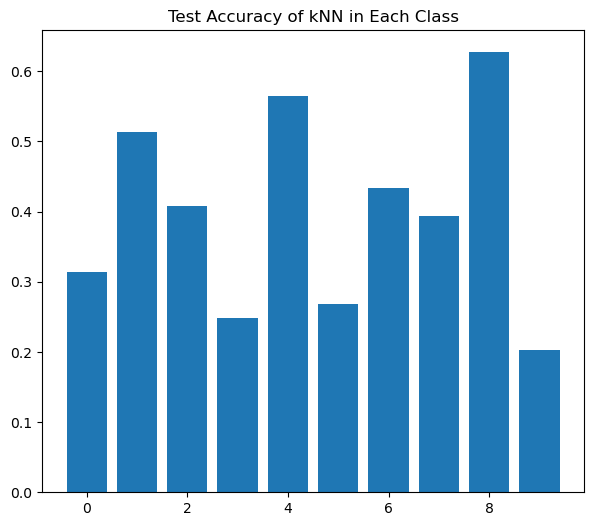

In [120]:
plt.figure(figsize=(7,6))
plt.bar(range(10), accuracy(preds_test, y_mel_test)[1].values())
plt.title("Test Accuracy of kNN in Each Class")

In [133]:
param_grid = {
    "weights": ["uniform", "distance"],
    "n_neighbors": [1, 2, 3, 5, 10, 20, 30, 50]
}
knn = KNeighborsClassifier()
grid_knn = GridSearchCV(knn, param_grid, cv=5, verbose=2, n_jobs=-1)
grid_knn.fit(X_mel_train_pca, y_mel_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [1, 2, 3, 5, 10, 20, 30, 50],
                         'weights': ['uniform', 'distance']},
             verbose=2)

In [148]:
grid_knn.best_params_

{'n_neighbors': 5, 'weights': 'distance'}

In [168]:
grid_knn.cv_results_['mean_test_score'].max()

0.4777585326100177

In [134]:
preds_train = grid_knn.predict(X_mel_train_pca)
preds_test = grid_knn.predict(X_mel_test_pca)

In [135]:
accuracy(preds_train, y_mel_train)

(1.0,
 {0: 1.0,
  1: 1.0,
  2: 1.0,
  3: 1.0,
  4: 1.0,
  5: 1.0,
  6: 1.0,
  7: 1.0,
  8: 1.0,
  9: 1.0})

In [136]:
accuracy(preds_test, y_mel_test)

(0.3773327264451525,
 {0: 0.29333333333333333,
  1: 0.41025641025641024,
  2: 0.36454849498327757,
  3: 0.2663755458515284,
  4: 0.5643939393939394,
  5: 0.2727272727272727,
  6: 0.43333333333333335,
  7: 0.4025423728813559,
  8: 0.635593220338983,
  9: 0.25333333333333335})

In [142]:
grid_knn.cv_results_['mean_test_score']

array([0.47397313, 0.47397313, 0.45992978, 0.47397313, 0.47721848,
       0.47559669, 0.47073637, 0.47775853, 0.43652225, 0.46028981,
       0.38807308, 0.40608282, 0.35799823, 0.39041639, 0.33404838,
       0.36484216])

In [146]:
grid_knn.cv_results_['params']

[{'n_neighbors': 1, 'weights': 'uniform'},
 {'n_neighbors': 1, 'weights': 'distance'},
 {'n_neighbors': 2, 'weights': 'uniform'},
 {'n_neighbors': 2, 'weights': 'distance'},
 {'n_neighbors': 3, 'weights': 'uniform'},
 {'n_neighbors': 3, 'weights': 'distance'},
 {'n_neighbors': 5, 'weights': 'uniform'},
 {'n_neighbors': 5, 'weights': 'distance'},
 {'n_neighbors': 10, 'weights': 'uniform'},
 {'n_neighbors': 10, 'weights': 'distance'},
 {'n_neighbors': 20, 'weights': 'uniform'},
 {'n_neighbors': 20, 'weights': 'distance'},
 {'n_neighbors': 30, 'weights': 'uniform'},
 {'n_neighbors': 30, 'weights': 'distance'},
 {'n_neighbors': 50, 'weights': 'uniform'},
 {'n_neighbors': 50, 'weights': 'distance'}]

In [150]:
param_grid = {
    'n_estimators': [5, 10, 15, 20],
    'max_depth': [1, 5, 10, 25, 50, 100],
    'max_features': ["sqrt", "log2", None]
}
rf = RandomForestClassifier(class_weight={0: 1/0.126, 1: 1/0.0354, 2: 1/0.1253, 3: 1/0.0942, 4: 1/0.1093, 
                                          5: 1/0.1298, 6: 1/0.0149, 7: 1/0.1185, 8: 1/0.1203, 9: 1/0.1261})
grid_rf = GridSearchCV(rf, param_grid, cv=10, n_jobs=-1)
grid_rf.fit(X_mel_train_pca, y_mel_train)
grid_rf.cv_results_.keys()
grid_rf.best_params_
preds_train = grid_rf.best_estimator_.predict(X_mel_train_pca)
preds_test = grid_rf.best_estimator_.predict(X_mel_test_pca)
print(accuracy(preds_train, y_mel_train))
print(accuracy(preds_test, y_mel_test))

(0.9992796686475779, {0: 1.0, 1: 1.0, 2: 0.9985632183908046, 3: 0.9980879541108987, 4: 1.0, 5: 1.0, 6: 1.0, 7: 1.0, 8: 0.9985029940119761, 9: 0.9985714285714286})
(0.4155666818388712, {0: 0.3, 1: 0.5128205128205128, 2: 0.5050167224080268, 3: 0.37117903930131, 4: 0.5, 5: 0.2878787878787879, 6: 0.3, 7: 0.3813559322033898, 8: 0.6779661016949152, 9: 0.3333333333333333})


In [152]:
grid_rf.best_params_

{'max_depth': 100, 'max_features': None, 'n_estimators': 20}

In [156]:
out = []
for p, s in zip(grid_rf.cv_results_['params'], grid_rf.cv_results_['mean_test_score']):
    out.append((p, s))

In [157]:
out

[({'max_depth': 1, 'max_features': 'sqrt', 'n_estimators': 5},
  0.15380193142783072),
 ({'max_depth': 1, 'max_features': 'sqrt', 'n_estimators': 10},
  0.15234817551364316),
 ({'max_depth': 1, 'max_features': 'sqrt', 'n_estimators': 15},
  0.21319722600298144),
 ({'max_depth': 1, 'max_features': 'sqrt', 'n_estimators': 20},
  0.22169486032795388),
 ({'max_depth': 1, 'max_features': 'log2', 'n_estimators': 5},
  0.14515069025860394),
 ({'max_depth': 1, 'max_features': 'log2', 'n_estimators': 10},
  0.1610003888780867),
 ({'max_depth': 1, 'max_features': 'log2', 'n_estimators': 15},
  0.16748006999805562),
 ({'max_depth': 1, 'max_features': 'log2', 'n_estimators': 20},
  0.20602080497763953),
 ({'max_depth': 1, 'max_features': None, 'n_estimators': 5},
  0.13344319139283167),
 ({'max_depth': 1, 'max_features': None, 'n_estimators': 10},
  0.14118996694536262),
 ({'max_depth': 1, 'max_features': None, 'n_estimators': 15},
  0.14965713915354203),
 ({'max_depth': 1, 'max_features': None, '